## Data Preprocessing and Cleaning

## 1: Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Set display options to show all columns
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

# Load the synthetic data generated in Phase 1
try:
    df = pd.read_csv("ethio_telecom_high_precision_churn_data.csv")
    print("DataFrame loaded successfully.")
    print("Initial 5 rows:")
    print(df.head())
    print("\nInitial data types and non-null counts:")
    df.info()
except FileNotFoundError:
    print("Error: 'ethio_telecom_high_precision_churn_data.csv' not found. Please run Phase 1 first.")

DataFrame loaded successfully.
Initial 5 rows:
                             CustomerID                       Region  \
0  8fbb945c-8e57-4d32-87bb-57cc7f38c47d   Addis Ababa (High Density)   
1  582f68aa-c94c-4548-9e06-27c2cf3539ee  Regional City (Mid Density)   
2  f10db765-7e5a-4718-9059-6ee5f66449f2  Regional City (Mid Density)   
3  b96ffe6a-2555-4816-968e-f9322b440a82     Rural Area (Low Density)   
4  b04bb9f9-d01c-4fab-be7e-093cd297540b  Regional City (Mid Density)   

    Contract_Type           Service_Plan  Tenure_Months  Monthly_Charges_ETB  \
0         6-Month  Data/Internet + Voice             46               631.96   
1  Month-to-month  Data/Internet + Voice             72               527.19   
2        24-Month  Data/Internet + Voice             32               596.04   
3        12-Month     Basic Mobile Voice             54               521.26   
4        12-Month     Basic Mobile Voice             69               331.43   

   Support_Calls_3Months  Network_Outag

## 2: Data Cleaning and Initial Feature Engineering

#### 1. Simulate Total Charges (Monthly * Tenure)

In [2]:
# In a real dataset, this column often has missing values (NaN) for new customers (Tenure=0).
# Here, we calculate it directly as our synthetic data doesn't have the typical missing values.
df['Total_Charges_ETB'] = df['Monthly_Charges_ETB'] * df['Tenure_Months']
print("New feature 'Total_Charges_ETB' created.")

New feature 'Total_Charges_ETB' created.


#### 2. Drop the non-predictive CustomerID column

In [3]:
df = df.drop('CustomerID', axis=1)
print("'CustomerID' column dropped.")

'CustomerID' column dropped.


#### 3. Convert the Target Variable to Integer

In [4]:
df['Churn'] = df['Churn'].astype(int)
print("'Churn' (Target) column converted from Boolean to Integer (1=Churn, 0=No Churn).")

'Churn' (Target) column converted from Boolean to Integer (1=Churn, 0=No Churn).


In [5]:
print("\nFirst 5 rows after cleaning and engineering:")
print(df.head())


First 5 rows after cleaning and engineering:
                        Region   Contract_Type           Service_Plan  \
0   Addis Ababa (High Density)         6-Month  Data/Internet + Voice   
1  Regional City (Mid Density)  Month-to-month  Data/Internet + Voice   
2  Regional City (Mid Density)        24-Month  Data/Internet + Voice   
3     Rural Area (Low Density)        12-Month     Basic Mobile Voice   
4  Regional City (Mid Density)        12-Month     Basic Mobile Voice   

   Tenure_Months  Monthly_Charges_ETB  Support_Calls_3Months  \
0             46               631.96                      2   
1             72               527.19                      1   
2             32               596.04                      1   
3             54               521.26                      3   
4             69               331.43                      2   

   Network_Outage_Score_0_5 Network_Technology  Churn  Total_Charges_ETB  
0                         1                 5G      0  

## 3: Categorical Feature Encoding

In [6]:
# Identify all remaining categorical (object) columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(f"Categorical columns to encode: {list(categorical_cols)}")

Categorical columns to encode: ['Region', 'Contract_Type', 'Service_Plan', 'Network_Technology']


In [7]:
# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Update the main DataFrame
df = df_encoded

In [8]:
print("\nFirst 5 rows after One-Hot Encoding (Note the new binary columns):")
print(df.head())

print(f"\nFinal DataFrame shape after encoding: {df.shape}")
print(f"Number of new features created: {len(df.columns) - len(df_encoded.columns)}")


First 5 rows after One-Hot Encoding (Note the new binary columns):
   Tenure_Months  Monthly_Charges_ETB  Support_Calls_3Months  \
0             46               631.96                      2   
1             72               527.19                      1   
2             32               596.04                      1   
3             54               521.26                      3   
4             69               331.43                      2   

   Network_Outage_Score_0_5  Churn  Total_Charges_ETB  \
0                         1      0           29070.16   
1                         0      0           37957.68   
2                         3      0           19073.28   
3                         0      0           28148.04   
4                         2      0           22868.67   

   Region_Regional City (Mid Density)  Region_Rural Area (Low Density)  \
0                               False                            False   
1                                True                   

# Exploratory Data Analysis (EDA)

### 1: Overall Churn Rate Analysis (Class Imbalance Check)

#### Calculate churn rate

In [9]:
churn_rate = df['Churn'].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")

Overall Churn Rate: 13.36%


#### Visualize the class distribution

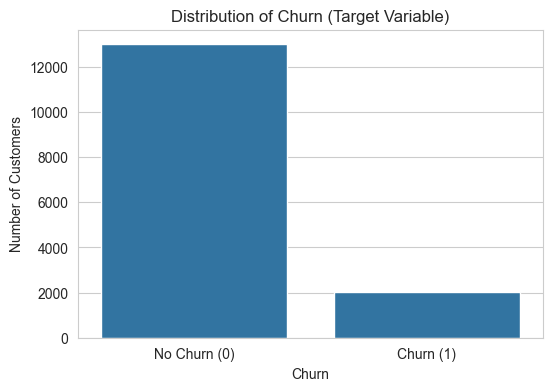


Insight: The churn rate is around 13.36% (as designed). This confirms the **class imbalance** problem, which we will address in Phase 3 using SMOTE.


In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn (Target Variable)')
plt.xticks([0, 1], ['No Churn (0)', 'Churn (1)'])
plt.ylabel('Number of Customers')
plt.show()

print("\nInsight: The churn rate is around 13.36% (as designed). This confirms the **class imbalance** problem, which we will address in Phase 3 using SMOTE.")

#### 2: Churn by Contract Type Analysis

2. Churn Rate by Contract Type 


C:\Users\AKE\AppData\Local\Temp\ipykernel_2108\3093306810.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=m2m_col, y='Churn', data=df, errorbar=None, palette=['skyblue', 'salmon'])


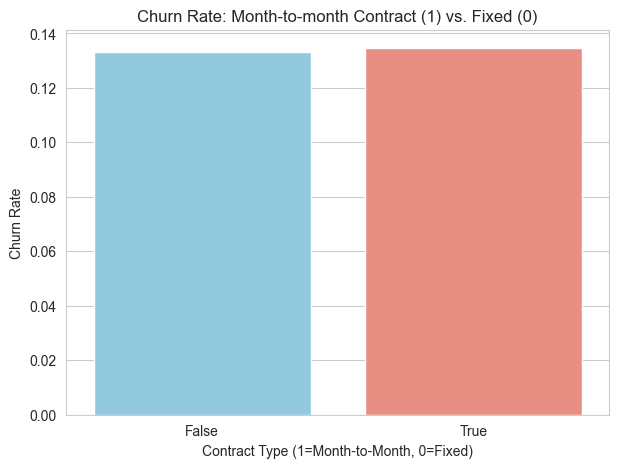

Churn Rate for Month-to-Month Contracts: 13.46%
Churn Rate for Fixed Contracts: 13.33%


In [11]:
# We use the encoded column for 'Month-to-month' contract
m2m_col = 'Contract_Type_Month-to-month'

print("2. Churn Rate by Contract Type ")

# Calculate the actual churn rate for M-to-M (1) vs. Fixed (0)
churn_by_m2m = df.groupby(m2m_col)['Churn'].mean() * 100

plt.figure(figsize=(7, 5))
sns.barplot(x=m2m_col, y='Churn', data=df, errorbar=None, palette=['skyblue', 'salmon'])
plt.title('Churn Rate: Month-to-month Contract (1) vs. Fixed (0)')
plt.xlabel('Contract Type (1=Month-to-Month, 0=Fixed)')
plt.ylabel('Churn Rate')
plt.show()

print(f"Churn Rate for Month-to-Month Contracts: {churn_by_m2m.iloc[1]:.2f}%")
print(f"Churn Rate for Fixed Contracts: {churn_by_m2m.iloc[0]:.2f}%")

### 3: Correlation Heatmap

#### Feature Correlation with Churn

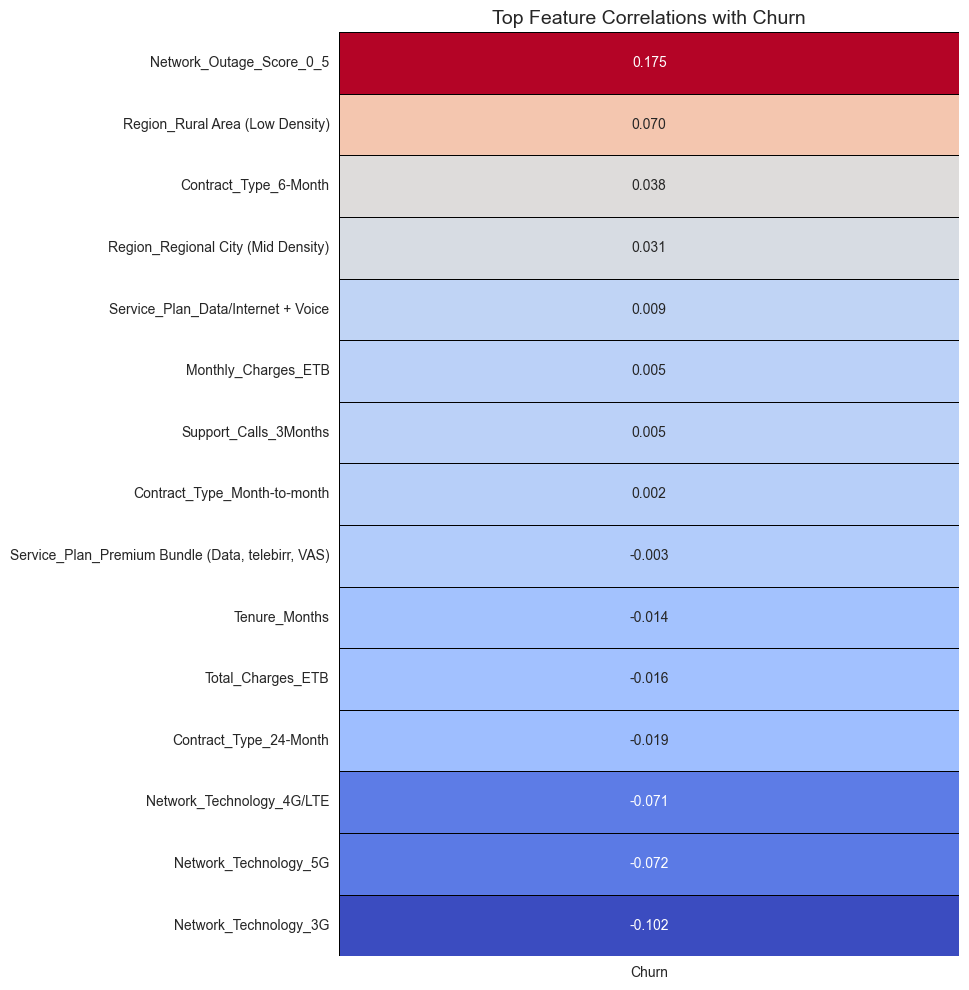


  Top 5 Churn Predictors (Positive Correlation)
Network_Outage_Score_0_5              0.174884
Region_Rural Area (Low Density)       0.069785
Contract_Type_6-Month                 0.038396
Region_Regional City (Mid Density)    0.030769
Service_Plan_Data/Internet + Voice    0.009375
Name: Churn, dtype: float64

 Top 5 Non-Churn Predictors (Negative Correlation)
Total_Charges_ETB           -0.015512
Contract_Type_24-Month      -0.019452
Network_Technology_4G/LTE   -0.071105
Network_Technology_5G       -0.071934
Network_Technology_3G       -0.101778
Name: Churn, dtype: float64


In [15]:
plt.figure(figsize=(8, 12))
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Focus only on the 'Churn' column and sort the values
churn_correlations = correlation_matrix['Churn'].drop('Churn').sort_values(ascending=False)

# Create a heatmap visualization
sns.heatmap(churn_correlations.to_frame(), 
            annot=True, 
            fmt=".3f", 
            cmap='coolwarm', 
            cbar=False, 
            linewidths=0.5, 
            linecolor='black')
plt.title('Top Feature Correlations with Churn', fontsize=14)
plt.show()

print("\n  Top 5 Churn Predictors (Positive Correlation)")
print(churn_correlations.head(5))

print("\n Top 5 Non-Churn Predictors (Negative Correlation)")
print(churn_correlations.tail(5))

# Feature Engineering and Model Building

#### Splitting and Scaling

##### 1. Define X (Features) and y (Target)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is the processed DataFrame from Phase 2
X = df.drop('Churn', axis=1)
y = df['Churn']

##### 2. Split Data (80% Train, 20% Test)

In [17]:
# Use stratify=y to ensure the train and test sets have the same 13.36% churn rate
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"X_train shape before scaling/SMOTE: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Training Churn Rate: {y_train.mean():.4f}")

X_train shape before scaling/SMOTE: (12000, 15)
X_test shape: (3000, 15)
Training Churn Rate: 0.1336


##### 3. Identify Numerical Columns for Scaling

In [18]:
# We want to scale continuous numerical features: Tenure, Monthly Charges, Total Charges.
# All other features are binary (0/1) from One-Hot Encoding and should not be scaled.
numerical_cols = ['Tenure_Months', 'Monthly_Charges_ETB', 'Support_Calls_3Months', 
                  'Network_Outage_Score_0_5', 'Total_Charges_ETB']

##### 4. Apply Standard Scaling

In [19]:
scaler = StandardScaler()

# Fit scaler on X_train and transform both X_train and X_test
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("\nData split, stratified, and continuous features scaled.")
print("X_train head after scaling (note standardized numerical values):")
X_train.head()


Data split, stratified, and continuous features scaled.
X_train head after scaling (note standardized numerical values):


,Tenure_Months,Monthly_Charges_ETB,Support_Calls_3Months,Network_Outage_Score_0_5,Total_Charges_ETB,Region_Regional City (Mid Density),Region_Rural Area (Low Density),Contract_Type_24-Month,Contract_Type_6-Month,Contract_Type_Month-to-month,Service_Plan_Data/Internet + Voice,"Service_Plan_Premium Bundle (Data, telebirr, VAS)",Network_Technology_3G,Network_Technology_4G/LTE,Network_Technology_5G
7116,0.059229,0.540943,-0.714492,0.866654,0.348304,True,False,False,True,False,True,False,False,False,False
1791,-1.557511,-1.188542,-0.714492,0.866654,-1.273454,False,False,False,True,False,True,False,False,False,True
4080,0.515232,-0.347101,0.703737,0.866654,0.149856,False,True,False,False,False,False,False,False,False,False
4367,0.473777,0.860773,-0.005377,0.280549,0.956666,False,True,False,True,False,True,False,False,False,False
10355,0.473777,-0.870871,-0.714492,-1.477766,-0.239268,True,False,False,True,False,True,False,False,True,False


#### Applying SMOTE to Training Data

In [20]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print(f"\nOriginal Training Samples: {X_train.shape[0]}")
print(f"SMOTE Training Samples: {X_train_sm.shape[0]}")

# Check the new class distribution
print("\nNew Churn Distribution in SMOTE Training Data:")
print(pd.Series(y_train_sm).value_counts(normalize=True))

print("Training data is now balanced (50% Churn / 50% Non-Churn). Ready for modeling.")


Original Training Samples: 12000
SMOTE Training Samples: 20794

New Churn Distribution in SMOTE Training Data:
Churn
1    0.5
0    0.5
Name: proportion, dtype: float64
Training data is now balanced (50% Churn / 50% Non-Churn). Ready for modeling.


### Model Evaluation and Presentation of Insights

##### Model Training (Logistic Regression, Random Forest, XGBoost)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [22]:
# Dictionary to store models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear'),
    "Random Forest Classifier": RandomForestClassifier(random_state=42, n_estimators=100),
    "XGBoost Classifier": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

In [23]:
# Dictionary to store predictions for later evaluation
y_preds = {}

print("Training Models")

for name, model in models.items():
    print(f"Training {name}...")
    
    # Train model using SMOTE data
    model.fit(X_train_sm, y_train_sm)
    
    # Make predictions on the **UNSEEN (UNSMOTED) TEST DATA**
    y_preds[name] = model.predict(X_test)
    
    print(f"  {name} trained and predictions generated.")

print("\n All three models trained successfully on balanced data.")

Training Models
Training Logistic Regression...
  Logistic Regression trained and predictions generated.
Training Random Forest Classifier...
  Random Forest Classifier trained and predictions generated.
Training XGBoost Classifier...


C:\Users\AKE\Desktop\telecom\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:22:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  XGBoost Classifier trained and predictions generated.

 All three models trained successfully on balanced data.


#### Model Evaluation (Classification Report and Confusion Matrix)


====================== Logistic Regression ======================
              precision    recall  f1-score   support

No Churn (0)       0.92      0.67      0.77      2599
   Churn (1)       0.23      0.64      0.34       401

    accuracy                           0.66      3000
   macro avg       0.58      0.65      0.56      3000
weighted avg       0.83      0.66      0.72      3000



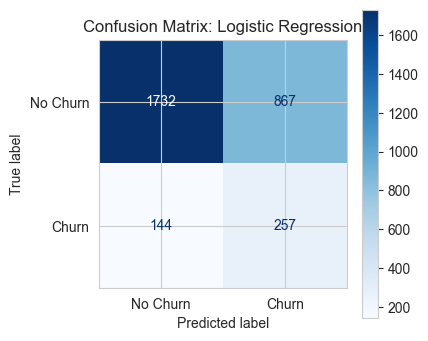


====================== Random Forest Classifier ======================
              precision    recall  f1-score   support

No Churn (0)       0.91      0.94      0.93      2599
   Churn (1)       0.52      0.39      0.45       401

    accuracy                           0.87      3000
   macro avg       0.71      0.67      0.69      3000
weighted avg       0.86      0.87      0.86      3000



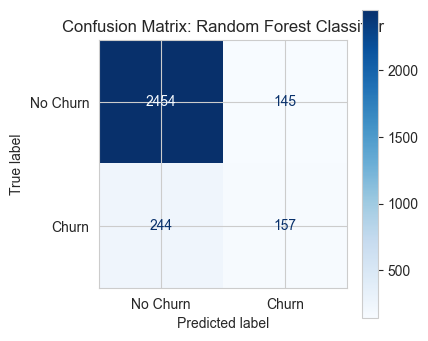


====================== XGBoost Classifier ======================
              precision    recall  f1-score   support

No Churn (0)       0.91      0.95      0.93      2599
   Churn (1)       0.58      0.41      0.48       401

    accuracy                           0.88      3000
   macro avg       0.75      0.68      0.71      3000
weighted avg       0.87      0.88      0.87      3000



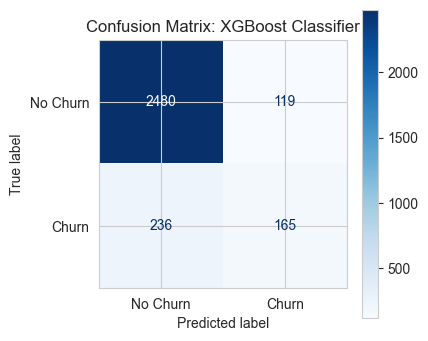

The model with the highest F1-Score for the Churn class is the: XGBoost Classifier (F1: 0.4818)


In [24]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_preds (dictionary of model predictions) and y_test are available
best_f1_score = 0
best_model_name = ""

for name, y_pred in y_preds.items():
    print(f"\n====================== {name} ======================")
    
    # 1. Print Classification Report
    report = classification_report(y_test, y_pred, target_names=['No Churn (0)', 'Churn (1)'], output_dict=True)
    print(classification_report(y_test, y_pred, target_names=['No Churn (0)', 'Churn (1)']))
    
    # 2. Track the Best Model based on F1-Score for the Churn Class (1)
    current_f1 = report['Churn (1)']['f1-score']
    if current_f1 > best_f1_score:
        best_f1_score = current_f1
        best_model_name = name
        
    # 3. Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
    
    fig, ax = plt.subplots(figsize=(4, 4))
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    plt.title(f'Confusion Matrix: {name}')
    plt.show()

print(f"The model with the highest F1-Score for the Churn class is the: {best_model_name} (F1: {best_f1_score:.4f})")

# Retrieve the best model object
best_model = models[best_model_name]

### Saving the Best Model

In [25]:
import joblib 
import os 
from xgboost import XGBClassifier # Import the specific model class

#  1. Identify the Best Model Object
# Assuming 'models' dictionary and 'best_model_name' are available from the code above.
best_model = models[best_model_name]

# 2. Define the Filename
# Create a cleaner filename based on the best model type
filename = f"{best_model_name.lower().replace(' ', '_')}_churn_model.joblib"

# 3. Save the Model to Disk
try:
    joblib.dump(best_model, filename)
    print(f"\n Successfully saved the best model ('{best_model_name}') to disk.")
    print(f"File path: {os.path.abspath(filename)}")

except NameError:
    # This handles the case where 'models' or 'best_model_name' might not be fully defined 
    # in the context where this code block is run immediately after the previous one.
    print("\nError: Could not save model. Ensure 'models' dictionary and 'best_model_name' are defined.")
except Exception as e:
    print(f"\nAn unexpected error occurred during saving: {e}")


 Successfully saved the best model ('XGBoost Classifier') to disk.
File path: C:\Users\AKE\Desktop\telecom\xgboost_classifier_churn_model.joblib


#### Feature Importance Analysis


Top 10 Feature Importances for XGBoost Classifier:
                           Feature  Importance
          Network_Outage_Score_0_5    0.199104
Region_Regional City (Mid Density)    0.135307
   Region_Rural Area (Low Density)    0.127270
             Support_Calls_3Months    0.100048
             Network_Technology_3G    0.091638
         Network_Technology_4G/LTE    0.075405
             Contract_Type_6-Month    0.041596
            Contract_Type_24-Month    0.039429
      Contract_Type_Month-to-month    0.039238
             Network_Technology_5G    0.038127


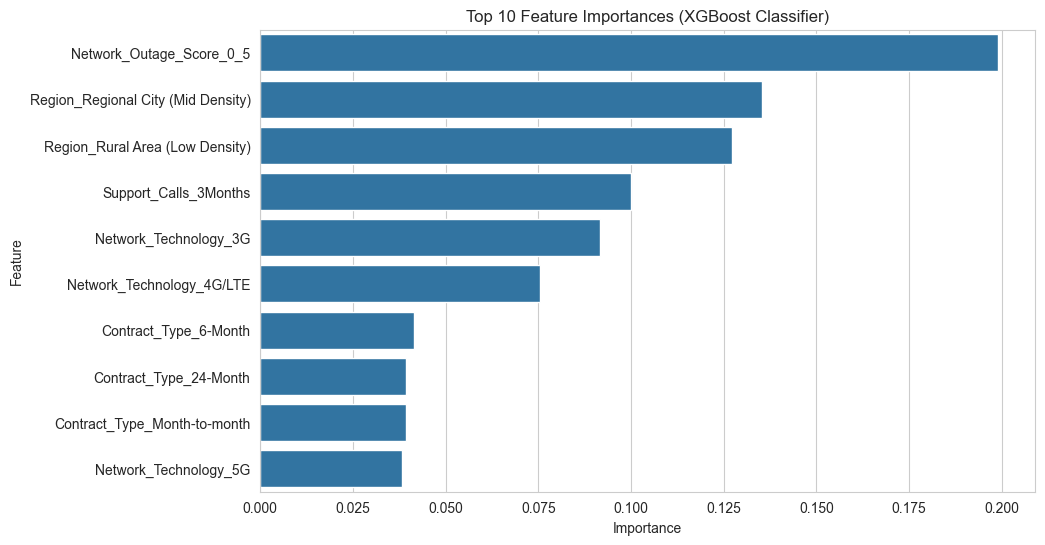

In [26]:
# Check if the best model supports feature importance (Random Forest and XGBoost do)
if hasattr(best_model, 'feature_importances_'):
    # Get feature importances
    importances = best_model.feature_importances_
    
    # Get feature names from the training data columns
    feature_names = X_train_sm.columns
    
    # Create a DataFrame for easy sorting and plotting
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    print(f"\nTop 10 Feature Importances for {best_model_name}:")
    print(feature_importance_df.head(10).to_string(index=False))
    
    # Visualize the top 10 features
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
    plt.title(f'Top 10 Feature Importances ({best_model_name})')
    plt.show()

elif hasattr(best_model, 'coef_'):
    # Handle Logistic Regression (Coefficients)
    coef = best_model.coef_[0]
    feature_names = X_train_sm.columns
    
    # Create DataFrame for coefficients
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coef
    }).sort_values(by='Coefficient', ascending=False, key=abs) # Sort by absolute value for importance
    
    print(f"\nTop 10 Absolute Coefficients for {best_model_name} (Positive and Negative impact):")
    print(feature_importance_df.head(10).to_string(index=False))

else:
    print(f"Feature importance not easily extracted for {best_model_name}.")

## Model Evaluation Summary

##### Based on the F1-score for the minority class (Churn (1)), the models rank as follows:

#### **Model:**
  - **XGBoost Classifier:** - Churn (1) Precision (True Churners Identified) [**58%**],  Churn (1) Recall (Total Churners Caught)  [**41%**],   Churn (1) F1-Score[**48%**]
  - **Random Forest:** - Churn (1) Precision (True Churners Identified)[**52%**], Churn (1) Recall (Total Churners Caught)[**39%**], Churn (1) F1-Score [**45%**]
  - **Logistic Regression:** - Churn (1) Precision (True Churners Identified)[**23%**], Churn (1) Recall (Total Churners Caught)[**64%**], Churn (1) F1-Score[**34%**]



**Conclusion:**                                                                                                                         --The XGBoost Classifier is the best model. It achieves the highest Precision (58%) and the highest F1-score (48%) for the churn class. This means that when XGBoost flags a customer as high-risk, it is correct 58% of the time, leading to more efficient retention spending.

### Top 5 Feature Importances for XGBoost Classifier and Business Interpretation

CORE CHURN DRIVERS FOR ETHIO TELECOM

**Based on XGBoost Feature Importance:**

1.  **Network_Outage_Score_0_5**
    * **Importance:** 19.91%
    * **Insight:** **Service Quality** is the #1 Driver. Frequent **network outages** are the most significant operational factor pushing customers to churn.

2.  **Region (Regional City & Rural)**
    * **Importance:** ~26% (Combined)
    * **Insight:** **Geographical Disparity**. Churn risk is highly concentrated outside the main high-density area (Addis Ababa), indicating a regional service gap. (Regional City: 13.53%; Rural Area: 12.73%).

3.  **Support_Calls_3Months**
    * **Importance:** 10.00%
    * **Insight:** Customer Experience Breakdown. **High volume of support calls** strongly suggests customers are frustrated by unresolved issues, making this a critical secondary driver.

4.  **Network_Technology (3G/4G/LTE)**
    * **Importance:** ~16% (Combined)
    * **Insight:** **Infrastructure Gap.** The technology gap (especially customers still on 3G) strongly influences the decision to leave, confirming network quality goes beyond simple outages. (3G: 9.16%; 4G/LTE: 7.54%).

OTHER SIGNIFICANT CONTRACT FACTORS

5.  **Contract_Type_6-Month:** 4.16%
6.  **Contract_Type_24-Month:** 3.94%
7.  **Contract_Type_Month-to-month:** 3.92%

**Summary:** **Operational and geographical factors** (Outages, Region, Support Calls) are overwhelmingly more predictive of churn than contract type in this model.

#### **Actionable Recommendation:** Proactive "Network Health" Retention.

- **Engineering Priority:** Dedicate 50% of the retention budget to network stability projects in flagged high-risk regions.

- **Retention Tactic:** Automatically flag any customer with an Outage **Score≥3 AND Support Calls≥3 in 3 months**. Do not call them. Instead, issue an automatic, personalized "We fixed your recent network issue" notification with a free data bonus to soothe the frustration immediately.

#### **Actionable Recommendation: Accelerate Regional Digital Inclusion.**

- **Infrastructure Strategy:** Prioritize 4G/LTE expansion (and limited 5G rollout) specifically in Regional Cities and surrounding Rural Areas.

- **Commercial Strategy:** Launch a 4G device and data subsidy program exclusively for customers in the high-risk regions currently on 3G (or 2G). Tie the subsidy to a 12-month contract commitment to lock them in.

#### **Actionable Recommendation: Incentivize Long-Term Commitment.**

- **Pricing Tactic:** Focus retention efforts on converting 6-Month customers, as they are exhibiting higher risk than Month-to-month customers in this model. Offer them a compelling price break or data upgrade to move to a 12-Month or 24-Month fixed contract. The low 24-Month churn importance suggests that long contracts are stable.